# K-Nearest Neighbors (KNN) and Linear Classifier Tutorial

In this tutorial, we will implement two fundamental classification algorithms:
1. **K-Nearest Neighbors (KNN)**: A simple, instance-based learning algorithm.
2. **Linear Classifier**: One of the simplest machine learning models used for classification.

## Objectives:
- Generate two dimensional synthetic data
- Download and subsample CIFAR dataset
- Implement KNN and Linear Classifiers from scratch.
- Use `scikit-learn` to apply both classifiers to a dataset.
- Visualize decision boundaries and evaluate model performance.

Refrences: https://cs231n.github.io/classification/

In [2]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt

from torch.utils.data import DataLoader, Subset
from torchvision import datasets, transforms
from torchvision.datasets import CIFAR10

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import fetch_openml
from scipy.spatial import distance

# Using the default libraries function
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
# Generating synthetic dataset
X_syn, y_syn = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=42)
X_train_syn, X_test_syn, y_train_syn, y_test_syn = train_test_split(X_syn, y_syn, test_size=0.2, random_state=42)

In [4]:
# To get unique values in y
unique_train_classes = np.unique(y_train_syn)
unique_test_classes = np.unique(y_test_syn)
print(unique_train_classes)

# Check if the unique classes in both arrays are equal
assert np.array_equal(unique_train_classes, unique_test_classes), "Unique classes in train and test sets are different."
# NumPy arrays do not support direct comparison for equality! Instead we should use array_equal function!

[0 1]


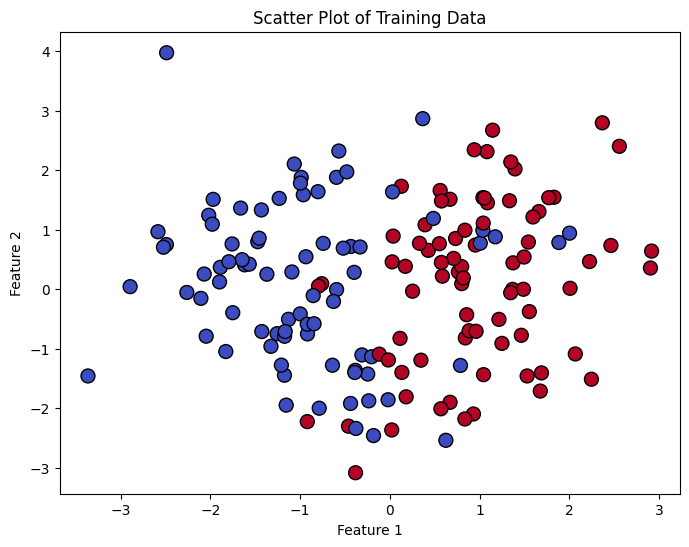

In [5]:
# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X_train_syn[:, 0], X_train_syn[:, 1], c=y_train_syn, cmap='coolwarm', edgecolor='k', s=100)
plt.title("Scatter Plot of Training Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

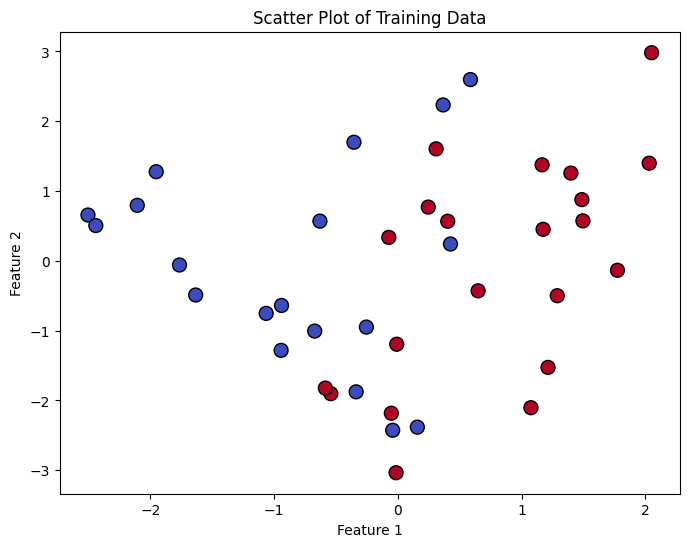

In [6]:
# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X_test_syn[:, 0], X_test_syn[:, 1], c=y_test_syn, cmap='coolwarm', edgecolor='k', s=100)
plt.title("Scatter Plot of Training Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# K-Nearest Neighbors (KNN) Classifier Tutorial

## Background

The K-Nearest Neighbors (KNN) classifier is a straightforward and intuitive machine learning algorithm used for classification tasks. It operates based on the principle of finding the 'K' closest training examples in the feature space to a given test example and classifying it based on the majority class among these 'K' neighbors.

### Key Concepts

- **Distance Metric**: KNN uses distance metrics to find the closest neighbors. Common distance metrics include:

  - **Euclidean Distance**: Measures the straight-line distance between two points.
  - **Manhattan Distance**: Measures the distance between two points along axes at right angles.
  - **Minkowski Distance**: Generalization of both Euclidean and Manhattan distances.


- **Choosing K**: The value of 'K' determines how many neighbors are considered for classifying a test instance:

  - **Small K**: Can make the model sensitive to noise in the data.
  - **Large K**: Can make the model less sensitive to local patterns and more computationally expensive.


- **Lazy Learning**: KNN is a lazy learner because it does not build a model during the training phase. Instead, it stores the training dataset and performs computation during the testing phase.

## Implementation

In this tutorial, we will:

1. Implement a custom KNN classifier.
2. Train and evaluate the classifier.


In [7]:
# Custom KNN Classifier
class CustomKNNClassifier:
    def __init__(self, k=3):
        self.k = k
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, X_test):
        y_pred = []
        for x in X_test:
            distances = [distance.euclidean(x, x_train) for x_train in self.X_train]
            # distances = [CustomEuclidean(x, x_train) for x_train in self.X_train]
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = [self.y_train[i] for i in k_indices]  # Get the labels
            most_common = np.bincount(k_nearest_labels).argmax()    # Find the most repeated one
            y_pred.append(most_common)
        return np.array(y_pred)

In [8]:
# Training the KNN
knn = CustomKNNClassifier(k=5)
knn.fit(X_train_syn, y_train_syn)

# Predicting
y_pred = knn.predict(X_test_syn)

# Evaluation
print("Custom KNN Accuracy:", accuracy_score(y_test_syn, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test_syn, y_pred))

Custom KNN Accuracy: 0.8
Confusion Matrix:
 [[15  4]
 [ 4 17]]


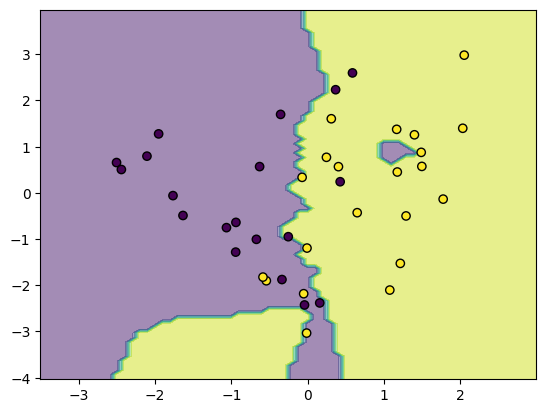

In [10]:
def plot_decision_boundary(clf, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    plt.show()

plot_decision_boundary(knn, X_test_syn, y_test_syn)

In [20]:
device = torch.device("cpu")
print(f"Using device: {device}")

Using device: cpu


In [22]:
mean = 0.0
stddev = 1.0

# Define Transformation for input image. You may be able to use many more transform using this.
transform=transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((mean), (stddev))])

In [23]:
cifar_train = datasets.CIFAR10('./data', train=True, download=True ,transform=transforms.ToTensor())
cifar_test = datasets.CIFAR10('./data', train=False, download=True ,transform=transforms.ToTensor())

Files already downloaded and verified
Files already downloaded and verified


Training data: 50000
Test data: 10000
Image shape: torch.Size([3, 32, 32])


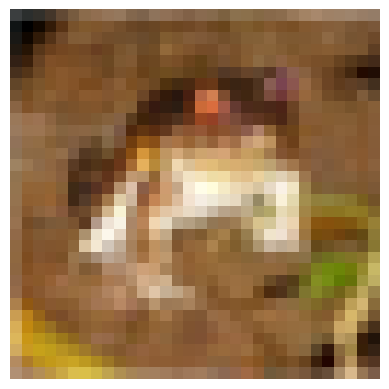

label: frog


In [24]:
print(f"Training data: {len(cifar_train)}")
print(f"Test data: {len(cifar_test)}")

image, label = cifar_train[0]
# Now you can check the shape of the image
print(f"Image shape: {image.shape}")
# If the image is in [C, H, W] format, we need to permute it to [H, W, C] for displaying
image_np = image.permute(1, 2, 0).cpu().numpy()

# Ensure it's in the right range [0, 255] for displaying
image_np = (image_np * 255).astype('uint8')

# Display the image
plt.imshow(image_np)
plt.axis('off')  # Turn off axis labels
plt.show()

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print(f"label: {classes[label]}")

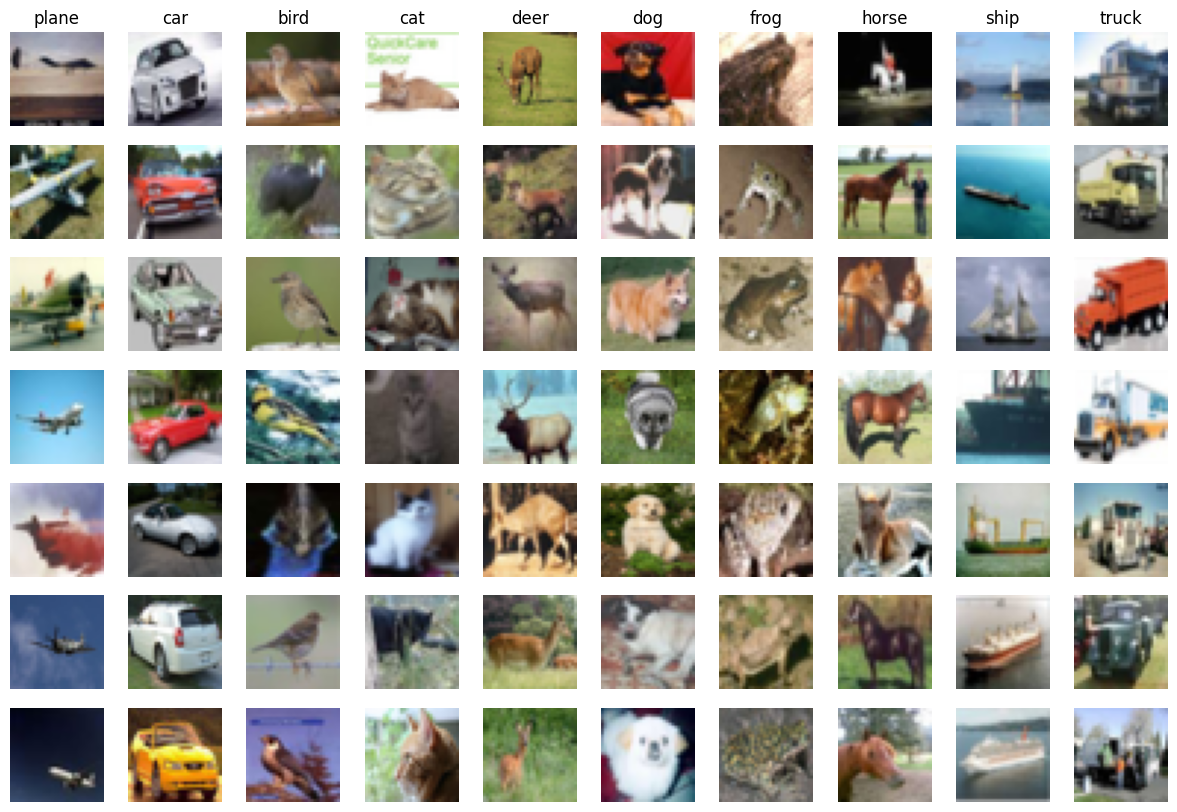

In [25]:
# Classes of CIFAR DATA
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7


# Collect labels and images for the CIFAR dataset
images, labels = [], []
for image, label in cifar_train:
    images.append(image)
    labels.append(label)

images = torch.stack(images)
labels = torch.tensor(labels)

# Now plotting the samples
plt.figure(figsize=(15, 10))  # Adjust the width and height to your preference

for y, cls in enumerate(classes):
    # Find indices of samples belonging to class `y`
    idxs = np.flatnonzero(labels == y)
    # Randomly choose some sample indices
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        # Convert tensor to NumPy and plot
        img_np = (images[idx].permute(1, 2, 0).cpu().numpy()*255).astype('uint8')  # Convert from [C, H, W] to [H, W, C]
        plt.imshow(img_np)
        plt.axis('off')
        if i == 0:
            plt.title(cls)

plt.show()

In [26]:
# Function to subsample CIFAR-10 dataset
def subsample_dataset(dataset, sample_size=1000):
    indices = np.random.choice(len(dataset), sample_size, replace=False)
    subset = Subset(dataset, indices)
    return subset

# Subsample the training and test datasets
sample_size = 1000
train_subset = subsample_dataset(cifar_train, sample_size=sample_size)
test_subset = subsample_dataset(cifar_test, sample_size=int(sample_size * 0.4))

# Load data into PyTorch DataLoader
train_loader = DataLoader(train_subset, batch_size=sample_size, shuffle=True)
test_loader = DataLoader(test_subset, batch_size=int(sample_size * 0.4), shuffle=False)

# Fetch all data and labels for easier handling
X_train, y_train = next(iter(train_loader))
X_test, y_test = next(iter(test_loader))

print("Before Flattening")
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

# Reshape the images to 2D for the KNN algorithm
X_train = X_train.view(X_train.size(0), -1).to(device)  # Flatten
X_test = X_test.view(X_test.size(0), -1).to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

print("After Flattening")
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Before Flattening
Training data shape: torch.Size([1000, 3, 32, 32])
Test data shape: torch.Size([400, 3, 32, 32])
After Flattening
Training data shape: torch.Size([1000, 3072])
Test data shape: torch.Size([400, 3072])


In [27]:
# Initialize and train custom KNN classifier
knn = CustomKNNClassifier(k=3)
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Custom KNN Classifier: {accuracy:.2f}")

Accuracy of Custom KNN Classifier: 0.21


In [28]:
knn_sklearn = KNeighborsClassifier(n_neighbors=3)
knn_sklearn.fit(X_train, y_train)

# Predicting
y_pred_sklearn = knn_sklearn.predict(X_test)

# Evaluation
print("sklearn KNN Accuracy:", accuracy_score(y_test, y_pred_sklearn))
print("Confusion Matrix (sklearn KNN):\n", confusion_matrix(y_test, y_pred_sklearn))

sklearn KNN Accuracy: 0.2125
Confusion Matrix (sklearn KNN):
 [[17  1  3  1  5  0  0  0  3  0]
 [ 8  4  9  2  7  0  2  0  9  0]
 [ 3  1 12  0 10  0  0  0  1  0]
 [ 4  0 18  5 10  1  2  0  3  0]
 [ 6  0 11  0 16  1  1  0  0  0]
 [ 6  0 18  4 15  1  0  0  3  0]
 [ 2  0 26  2 12  0 12  0  3  0]
 [12  0 12  2 12  0  4  3  3  0]
 [ 9  0  3  2  7  0  0  0 15  0]
 [13  3  2  4  3  0  3  1  7  0]]


## (kNN was developed in 1951).

In particular, note that images that are nearby each other are much more a function of the general color distribution of the images, or the type of background rather than their semantic identity. For example, a dog can be seen very near a frog since both happen to be on white background. Ideally we would like images of all of the 10 classes to form their own clusters, so that images of the same class are nearby to each other regardless of irrelevant characteristics and variations (such as the background). However, to get this property we will have to go beyond raw pixels.

## Linear Classifier: Perceptron 


### Components:

1. **Linear Output:**
   The linear combination of inputs and weights plus the bias is given by:

   $$
   \text{linear output} = \mathbf{x_i} \cdot \mathbf{w} + b
   $$

   - $\mathbf{x_i}$: Input feature vector.
   - $\mathbf{w}$: Weight vector.
   - $b$: Bias term.



### Update Rule:

When an error is detected, update the weights and bias as follows:

- **Weight Update:**

  $$
  \mathbf{w} \leftarrow \mathbf{w} + \text{lr} \cdot y_i \cdot \mathbf{x_i}
  $$

  - $\text{lr}$: Learning rate.
  - $y_i$: True label (mapped to -1 or 1).
  - $\mathbf{x_i}$: Input feature vector.


- **Bias Update:**
  $$
  b \leftarrow b + \text{lr} \cdot y_i
  $$

  - $y_i$: True label (mapped to -1 or 1).

### Explanation:

1. **Weight Update:**
   - When a prediction is incorrect, the weight adjustment $\text{lr} \cdot y_i \cdot \mathbf{x_i}$ helps to move the decision boundary closer to the correct classification. If the prediction was too low, increasing the weights for the features of the misclassified sample corrects the prediction.

2. **Bias Update:**
   - The bias is adjusted similarly to shift the decision boundary. The adjustment is proportional to the true label, ensuring the bias is moved in a way that reduces error.

### Summary:

The Perceptron updates weights and bias iteratively based on errors, with adjustments proportional to the learning rate. This process continues for a specified number of iterations or until the model converges.


In [29]:
class CustomPerceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        # Map labels to -1 and 1 for binary classification
        y_ = np.where(y == 0, -1, 1)  #True label mapped to -1 and 1

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                # Linear output
                linear_output = np.dot(x_i, self.weights) + self.bias
                # Update rule - 
                # The condition checks if the product of the true label and the linear output is less than or equal to 0, 
                # Indictes a misclassification (i.e., the sign of the prediction does not match the true label).
                if y_[idx] * linear_output <= 0:   
                    self.weights += self.lr * y_[idx] * x_i
                    self.bias += self.lr * y_[idx]

    def predict(self, X):
        predictions = np.sign(np.dot(X, self.weights) + self.bias)
        # Map -1 to 0
        predictions[predictions == -1] = 0
        return predictions

In [30]:
# Training the Perceptron
perceptron = CustomPerceptron(learning_rate=0.1, n_iters=1000)
perceptron.fit(X_train_syn, y_train_syn)

# Predicting
y_pred_perceptron = perceptron.predict(X_test_syn)

# Evaluation
print("Custom Perceptron Accuracy:", accuracy_score(y_test_syn, y_pred_perceptron))
print("Confusion Matrix:\n", confusion_matrix(y_test_syn, y_pred_perceptron))


Custom Perceptron Accuracy: 0.75
Confusion Matrix:
 [[15  4]
 [ 6 15]]


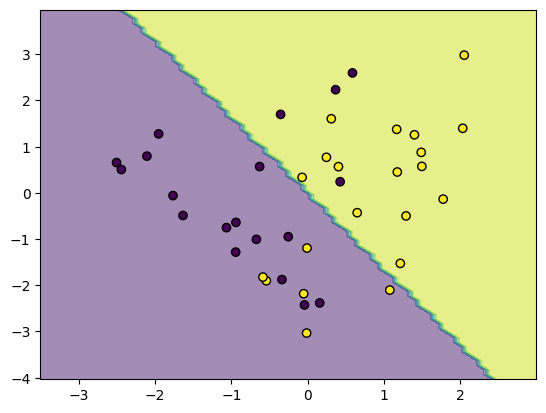

In [31]:
plot_decision_boundary(perceptron, X_test_syn, y_test_syn)